<a href="https://colab.research.google.com/github/Maham-Saleem12/m/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes-dataset.csv to diabetes-dataset.csv


In [2]:
import io
import pandas as pd

dataset = pd.read_csv('diabetes-dataset.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df = dataset.values #convert our dataframe into array

In [5]:

df

array([[2.00e+00, 1.38e+02, 6.20e+01, ..., 1.27e-01, 4.70e+01, 1.00e+00],
       [0.00e+00, 8.40e+01, 8.20e+01, ..., 2.33e-01, 2.30e+01, 0.00e+00],
       [0.00e+00, 1.45e+02, 0.00e+00, ..., 6.30e-01, 3.10e+01, 1.00e+00],
       ...,
       [6.00e+00, 8.50e+01, 7.80e+01, ..., 3.82e-01, 4.20e+01, 0.00e+00],
       [0.00e+00, 1.29e+02, 1.10e+02, ..., 3.19e-01, 2.60e+01, 1.00e+00],
       [2.00e+00, 8.10e+01, 7.20e+01, ..., 5.47e-01, 2.50e+01, 0.00e+00]])

In [7]:
#split our dataset into X input features and y(predict/label)
X = df[:,0:8]
Y = df[:,8]

In [8]:
#preprocess our dataset/scale/normalize our ds
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X

array([[-0.5153943 ,  0.52455322, -0.37248123, ...,  0.17268332,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.67008046, ...,  0.73724853,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -3.60442246, ...,  1.47363794,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46156812, ..., -0.12187245,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  2.12966682, ...,  4.28419085,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895,  0.14879962, ..., -0.25687717,
         0.23516743, -0.68659705]])

In [10]:
#split ds into test,train
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1400, 8) (300, 8) (300, 8) (1400,) (300,) (300,)


In [14]:
#build ann now
#first import keras
from keras.models import Sequential
from keras.layers import Dense
#keras sequential model///store model in variable and describe layer by layer 
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),   #first layer with 32 neurons and 26 input features(columns)
    Dense(32, activation='relu'),     #second layer
    Dense(1, activation='sigmoid'),  #third layer with 2 neuron and sigmoid active.
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [15]:
#configure the model, which optimizer algo,loss function, and metrics we use
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
44/44 [==============================] - 1s 11ms/step - loss: 0.7461 - accuracy: 0.4543 - val_loss: 0.6046 - val_accuracy: 0.7100
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7436 - val_loss: 0.5426 - val_accuracy: 0.7400
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7747 - val_loss: 0.5150 - val_accuracy: 0.7367
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7984 - val_loss: 0.5052 - val_accuracy: 0.7367
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7857 - val_loss: 0.4885 - val_accuracy: 0.7467
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8020 - val_loss: 0.4824 - val_accuracy: 0.7533
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8023 - val_loss: 0.4733 - val_accuracy: 0.7600
Epoch 8/100


In [17]:
loss,accuracy = model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.8833


In [18]:

print('Loss: %.2f' % loss)
print('Accuracy is:', accuracy*100)

Loss: 0.25
Accuracy is: 88.33333253860474


In [19]:
predic=model.predict(X)
print(X)
print("X=%s, Predicted=%s" % (X[0], Y[0]))

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
X=[-0.5153943   0.52455322 -0.37248123  0.87364499 -0.72201552  0.17268332
 -1.06324616  1.18042417], Predicted=1.0


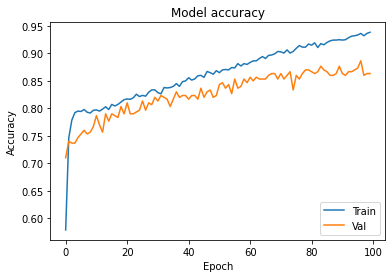

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

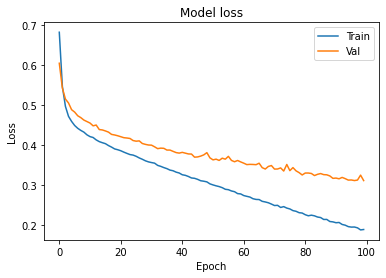

In [21]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [22]:
import tensorflow
import keras

#from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend



In [24]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))



In [25]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2125 - mse: 0.2125
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1651 - mse: 0.1651
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1553 - mse: 0.1553
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1387 - mse: 0.1387
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 11/100
63/63 [==============================] - 0s 1m

In [27]:
# evaluate the keras model
loss,mse = model.evaluate(X, Y)

63/63 [==============================] - 0s 1ms/step - loss: 0.0410 - mse: 0.0410


In [28]:
print('Loss: %.2f' % loss)
print('mse: %.2f' % mse)


Loss: 0.04
mse: 0.04


In [29]:
predic=model.predict(X)
print(X)
print("X=%s, Predicted=%s" % (X[0], Y[0]))

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
X=[-0.5153943   0.52455322 -0.37248123  0.87364499 -0.72201552  0.17268332
 -1.06324616  1.18042417], Predicted=1.0


In [30]:
from sklearn.model_selection import StratifiedKFold
import numpy
# define 10-fold cross validation 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)
cvscores = []
for train, test in kfold.split(X, Y):

  # create model
  model = Sequential()
  model.add(Dense(32, input_dim=8, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
  model.fit(X[train], Y[train], epochs=100, batch_size=10, verbose=0)
	# evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 96.50%
accuracy: 94.50%
accuracy: 95.50%
accuracy: 95.50%
accuracy: 94.50%
accuracy: 94.50%
accuracy: 96.50%
accuracy: 94.00%
accuracy: 95.50%
accuracy: 97.50%
95.45% (+/- 1.06%)
